In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
#reading our dataset
df=pd.read_csv('data.csv')

In [3]:
#getting a check on dataset
df.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
#After Research Only these Columns are Selected
df1 = df[['Age', 'EdLevel', 'DevType', 'Country', 'ConvertedCompYearly', 'WorkExp',
       'Industry']]

In [5]:
df1

,Age,EdLevel,DevType,Country,ConvertedCompYearly,WorkExp,Industry
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,10.0,"Information Services, IT, Software Development..."
2,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",United States of America,250000.0,23.0,"Information Services, IT, Software Development..."
3,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",United States of America,156000.0,7.0,NaN
4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Philippines,23456.0,6.0,Other
...,...,...,...,...,...,...,...
89179,25-34 years old,"Associate degree (A.A., A.S., etc.)","Developer, front-end",Brazil,NaN,NaN,NaN
89180,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Romania,NaN,NaN,NaN
89181,Prefer not to say,Something else,NaN,Israel,NaN,NaN,NaN
89182,Under 18 years old,"Secondary school (e.g. American high school, G...",System administrator,Switzerland,NaN,NaN,NaN


In [6]:
df1.columns

Index(['Age', 'EdLevel', 'DevType', 'Country', 'ConvertedCompYearly',
       'WorkExp', 'Industry'],
      dtype='object')

In [7]:
df1.Age.unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [8]:
df1.EdLevel.unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [9]:
df1.DevType.unique()

array([nan, 'Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Cloud infrastructure engineer', 'Engineering manager',
       'Developer Experience', 'Project manager', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df['EdLevel']

0                                                      NaN
1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                               ...                        
89179                  Associate degree (A.A., A.S., etc.)
89180         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
89181                                       Something else
89182    Secondary school (e.g. American high school, G...
89183         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, Length: 89184, dtype: object

In [12]:
def shorten_categories (categories, cutoff):
    
    categorical_map = {}
    for i in range (len (categories) ):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories (df1.Country.value_counts(), 1000)
df1[ 'Country'] = df1[ 'Country' ].map(country_map)
df1.Country.value_counts () 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5728\354812916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[ 'Country'] = df1[ 'Country' ].map(country_map)


Other                                                   25785
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Czech Re

In [14]:
df1 = df1.rename({"ConvertedComp": "Salary"}, axis=1)

In [15]:
df1.dropna(inplace=True)

In [16]:
percentile_unique={}
for i in df1.columns:
      percentile_unique[i]=df1[i].value_counts(dropna=False,normalize=True)*100

In [17]:
percentile_missing={}
for i in df1.columns:
    percentile_missing[i]=df1[i].isnull().mean()*100

PLOTTING THE BARS FOR UNIQUE VALUES IN EACH COLUMNS

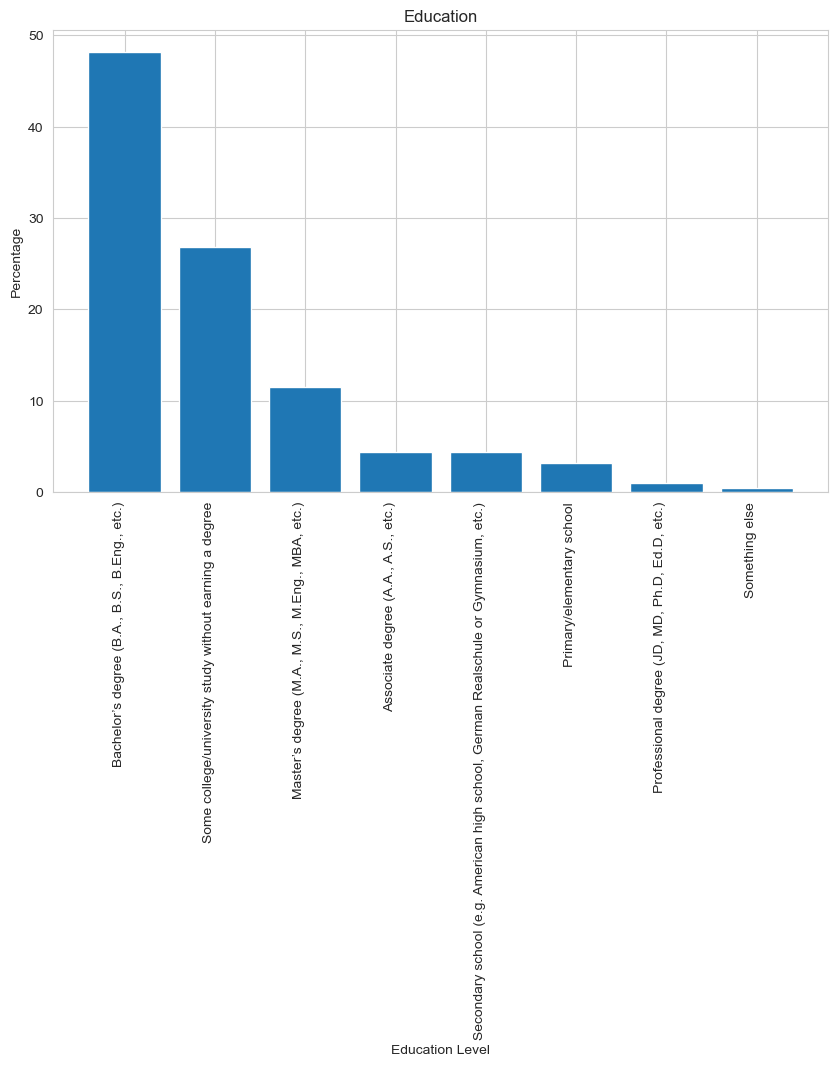

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))  # Adjust the figure size as per your preference
labels = [str(label) for label in df1['EdLevel'].unique()]  # Convert the labels to strings
plt.bar(labels, percentile_unique.get('EdLevel'))  # Use plt.bar for creating a bar chart
plt.xlabel('Education Level')  # Set the label for x-axis
plt.ylabel('Percentage')  # Set the label for y-axis
plt.title('Education')
plt.xticks(rotation=90, ha='right')# Set the title for the chart
plt.show()

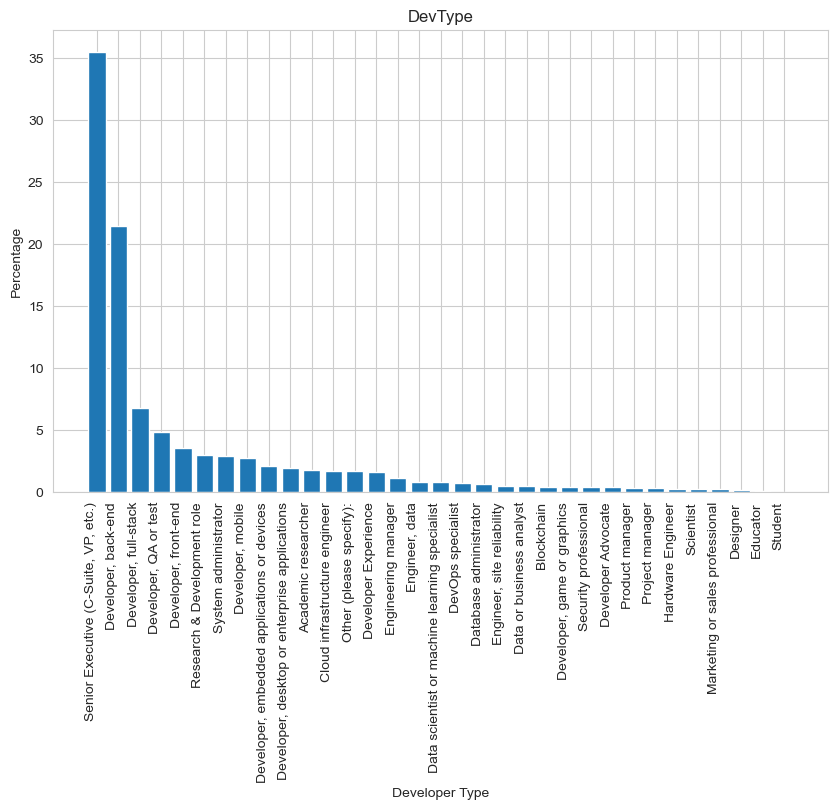

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))  # Adjust the figure size as per your preference
labels = [str(label) for label in df1['DevType'].unique()]  # Convert the labels to strings
plt.bar(labels, percentile_unique.get('DevType'))  # Use plt.bar for creating a bar chart
plt.xlabel('Developer Type')  # Set the label for x-axis
plt.ylabel('Percentage')  # Set the label for y-axis
plt.title('DevType')
plt.xticks(rotation=90, ha='right')# Set the title for the chart
plt.show()

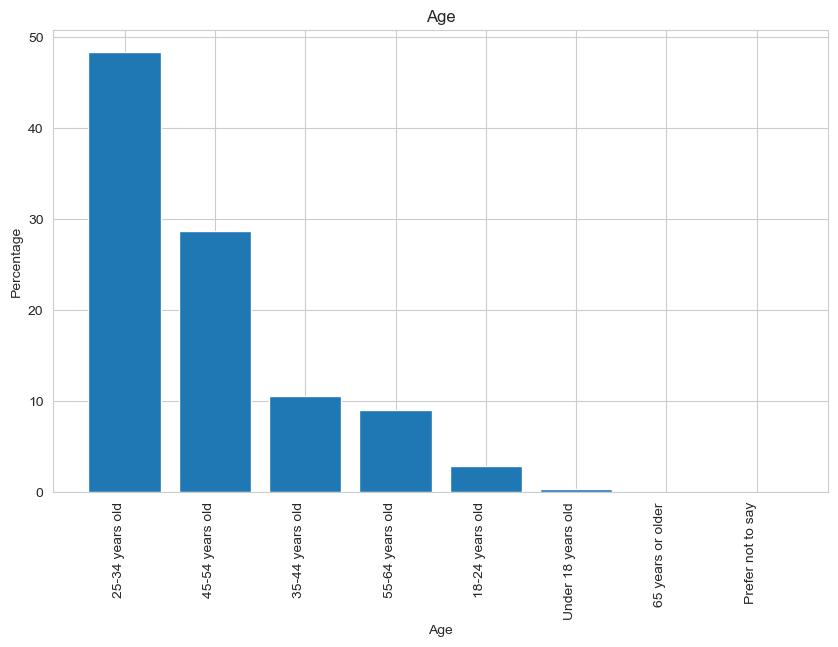

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))  # Adjust the figure size as per your preference
labels = [str(label) for label in df1['Age'].unique()]  # Convert the labels to strings
plt.bar(labels, percentile_unique.get('Age'))  # Use plt.bar for creating a bar chart
plt.xlabel('Age')  # Set the label for x-axis
plt.ylabel('Percentage')  # Set the label for y-axis
plt.title('Age')
plt.xticks(rotation=90, ha='right')# Set the title for the chart
plt.show()

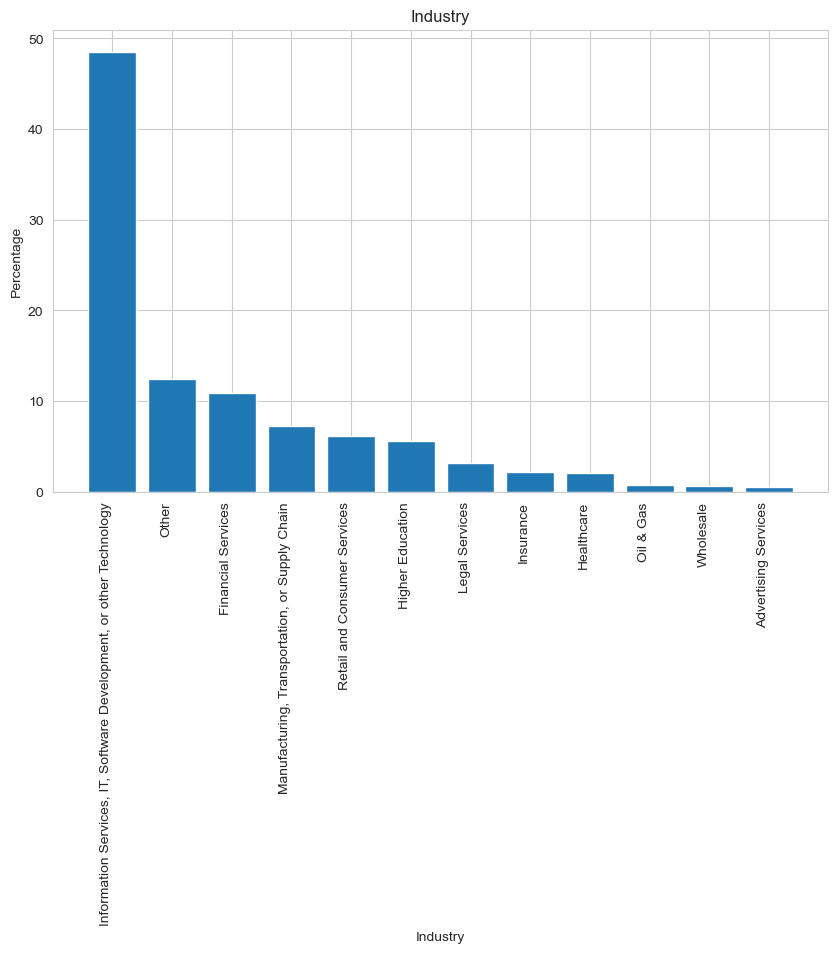

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))  # Adjust the figure size as per your preference
labels = [str(label) for label in df1['Industry'].unique()]  # Convert the labels to strings
plt.bar(labels, percentile_unique.get('Industry'))  # Use plt.bar for creating a bar chart
plt.xlabel('Industry')  # Set the label for x-axis
plt.ylabel('Percentage')  # Set the label for y-axis
plt.title('Industry')
plt.xticks(rotation=90, ha='right')# Set the title for the chart
plt.show()